In [2]:
from utils.imagenet_utils import load_data
from utils.layer_utils import *
from utils.model_utils import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image
import pickle
from tensorflow.keras.models import model_from_json 

In [3]:
%%time
train_data,train_label,val_data,val_label = load_data()

CPU times: user 6min 45s, sys: 10 s, total: 6min 55s
Wall time: 6min 55s


In [ ]:
np.save('train_label.npy',train_label)
np.save('train_data.npy',train_data)
np.save('val_data.npy',val_data)
np.save('val_data.npy',val_label)

In [ ]:
# train_label = np.save('train_data.npy')
# train_data = np.save('train_data.npy')
# val_data = np.save('train_data.npy')
# val_label = np.save('train_data.npy')

In [7]:
%%time
index_list = list(set(train_label))
train_data = np.array(train_data)
train_label = np.array([np.array([index_list.index(i)],dtype=np.uint8) for i in train_label])
val_data = np.array(val_data)
val_label = np.array([np.array([index_list.index(i)],dtype=np.uint8) for i in val_label])

CPU times: user 3.75 s, sys: 6.56 s, total: 10.3 s
Wall time: 10.3 s


In [8]:
print('Training data shape: ', train_data.shape)
print('Training labels shape: ', train_label.shape)
print('Validation data shape: ', val_data.shape)
print('Validation labels shape: ', val_label.shape)

Training data shape:  (78117, 224, 224, 3)
Training labels shape:  (78117, 1)
Validation data shape:  (19643, 224, 224, 3)
Validation labels shape:  (19643, 1)


In [9]:
train_label = keras.utils.to_categorical(train_label)
val_label = keras.utils.to_categorical(val_label)

In [10]:
def generator(X, y, batch_size, shuffle):
    base_gen = ImageDataGenerator()
    for X_base, y_base in base_gen.flow(X, y, batch_size=batch_size, shuffle=shuffle):
        X_batch = X_base / 255.0
        yield X_batch, y_base

In [11]:
%%time
bs = 64 #batch size
epc = 1 #number of epoches
train_generator = generator(train_data, train_label, bs,True)
val_generator = generator(val_data, val_label, bs,True)
# train_datagen=ImageDataGenerator()
# train_generator = train_datagen.flow(train_data_1, train_label_1, batch_size=bs)
step_size_train = train_data.shape[0]//bs
validation_steps=val_data.shape[0]//1000

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 10 µs


In [11]:
%%time
m6=PeleeNet(input_shape=(224,224,3), n_classes=198)
m6.compile(optimizer= 'Adam',loss='categorical_crossentropy',metrics=['accuracy'])
m6.summary()

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 112, 112, 32) 896         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1 (BatchNo (None, 112, 112, 32) 128         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 112, 112, 32) 0           batch_normalization_v1[0][0]     
_____________________________________

In [13]:
%%time
history_6 = m6.fit_generator(generator = train_generator,
                   steps_per_epoch = step_size_train,
                   epochs = epc,
                   validation_data=val_generator,validation_steps = validation_steps)

%matplotlib inline
%load_ext autoreload
%autoreload 2

acc = history_6.history['acc']
val_acc = history_6.history['val_acc']

loss = history_6.history['loss']
val_loss = history_6.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Instructions for updating:
Use tf.cast instead.
Epoch 1/2
1220/1220 [==============================] - 328s 269ms/step - loss: 5.2545 - acc: 0.1306 - val_loss: 4.7130 - val_acc: 0.1332
Epoch 2/2
1220/1220 [==============================] - 284s 233ms/step - loss: 3.6105 - acc: 0.2739 - val_loss: 3.8209 - val_acc: 0.2344
CPU times: user 10min 53s, sys: 2min 47s, total: 13min 40s
Wall time: 10min 57s


In [ ]:
%%time
# serialize weights to HDF5
m6.save_weights("./models/imagenet/m6.h5")
print("Saved model to disk")

In [16]:
%%time
m5=model5(input_shape=(224,224,3), n_classes=198)
m5.compile(optimizer= 'Adam',loss='categorical_crossentropy',metrics=['accuracy'])
m5.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv2d_113 (Conv2D)             (None, 112, 112, 32) 896         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1_113 (Bat (None, 112, 112, 32) 128         conv2d_113[0][0]                 
__________________________________________________________________________________________________
activation_113 (Activation)     (None, 112, 112, 32) 0           batch_normalization_v1_113[0][0] 
__________________________________________________________________________________________________
conv2d_114

Epoch 1/2
1220/1220 [==============================] - 290s 238ms/step - loss: 5.1352 - acc: 0.1264 - val_loss: 4.3973 - val_acc: 0.1562
Epoch 2/2
1220/1220 [==============================] - 267s 219ms/step - loss: 3.5973 - acc: 0.2705 - val_loss: 4.6761 - val_acc: 0.1431
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


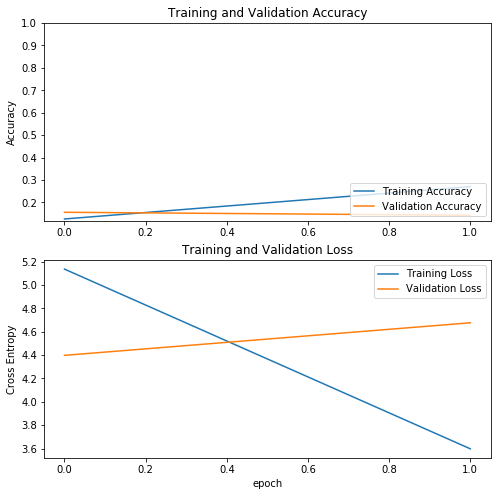

CPU times: user 10min 12s, sys: 2min 19s, total: 12min 32s
Wall time: 10min 10s


In [17]:
%%time
history_5 = m5.fit_generator(generator = train_generator,
                   steps_per_epoch = step_size_train,
                   epochs = epc,
                   validation_data=val_generator,validation_steps = validation_steps)

%matplotlib inline
%load_ext autoreload
%autoreload 2

acc = history_5.history['acc']
val_acc = history_5.history['val_acc']

loss = history_5.history['loss']
val_loss = history_5.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [18]:
%%time
# serialize weights to HDF5
m5.save_weights("./models/imagenet/m5.h5")
print("Saved model to disk")

Saved model to disk
CPU times: user 3min 14s, sys: 0 ns, total: 3min 14s
Wall time: 3min 13s


In [11]:
%%time
m4=model4(input_shape=(224,224,3), n_classes=198)
m4.compile(optimizer= 'Adam',loss='categorical_crossentropy',metrics=['accuracy'])
m4.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
activation_40 (Activation)      (None, 224, 224, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_v1_40 (Batc (None, 224, 224, 3)  12          activation_40[0][0]              
__________________________________________________________________________________________________
conv2d_40 (Conv2D)              (None, 112, 112, 32) 896         batch_normalization_v1_40[0][0]  
__________________________________________________________________________________________________
activation

In [12]:
%%time
history_4 = m4.fit_generator(generator = train_generator,
                   steps_per_epoch = step_size_train,
                   epochs = epc,
                   validation_data=val_generator,validation_steps = validation_steps)

%matplotlib inline
%load_ext autoreload
%autoreload 2

acc = history_4.history['acc']
val_acc = history_4.history['val_acc']

loss = history_4.history['loss']
val_loss = history_4.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

 354/1220 [=======>......................] - ETA: 1:53 - loss: 5.7307 - acc: 0.0145

KeyboardInterrupt: 

In [ ]:
%%time
# serialize weights to HDF5
m4.save_weights("./models/imagenet/m4.h5")
print("Saved model to disk")

In [22]:
%%time
m3=model3(input_shape=(224,224,3), n_classes=198)
m3.compile(optimizer= 'Adam',loss='categorical_crossentropy',metrics=['accuracy'])
m3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
activation_255 (Activation)  (None, 224, 224, 3)       0         
_________________________________________________________________
batch_normalization_v1_255 ( (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_255 (Conv2D)          (None, 224, 224, 16)      64        
_________________________________________________________________
activation_256 (Activation)  (None, 224, 224, 16)      0         
_________________________________________________________________
batch_normalization_v1_256 ( (None, 224, 224, 16)      64        
_________________________________________________________________
conv2d_256 (Conv2D)          (None, 224, 224, 16)      2320      
__________

1220/1220 [==============================] - 597s 490ms/step - loss: 5.0945 - acc: 0.0402 - val_loss: 5.0473 - val_acc: 0.0510
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


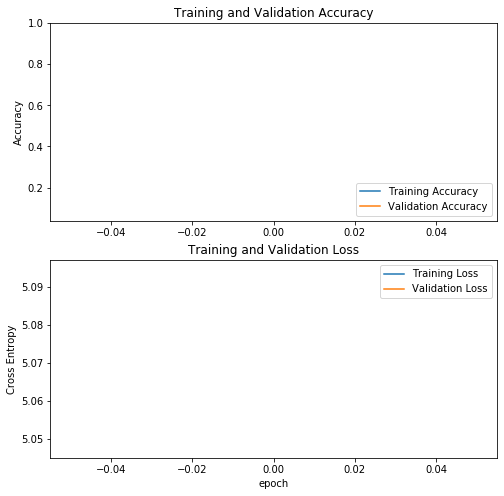

CPU times: user 7min 19s, sys: 2min 23s, total: 9min 42s
Wall time: 10min 46s


In [23]:
%%time
history_3 = m3.fit_generator(generator = train_generator,
                   steps_per_epoch = step_size_train,
                   epochs = epc,
                   validation_data=val_generator,validation_steps = validation_steps)

%matplotlib inline
%load_ext autoreload
%autoreload 2

acc = history_3.history['acc']
val_acc = history_3.history['val_acc']

loss = history_3.history['loss']
val_loss = history_3.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
%%time
# serialize weights to HDF5
m3.save_weights("./models/imagenet/m3.h5")
print("Saved model to disk")

In [12]:
%%time
m2=model2(input_shape=(224,224,3), n_classes=198)
m2.compile(optimizer= 'Adam',loss='categorical_crossentropy',metrics=['accuracy'])
m2.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 128)     512       
_________________________________________________________________
batch_normalization_v1 (Batc (None, 224, 224, 128)     512       
_________________________________________________________________
activation (Activation)      (None, 224, 224, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 224, 224, 16)      18448     
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 224, 224, 16)      64        
_________________________________________________________________
acti

In [13]:
%%time
history_2 = m2.fit_generator(generator = train_generator,
                   steps_per_epoch = step_size_train,
                   epochs = epc,
                   validation_data=val_generator,validation_steps = validation_steps)

%matplotlib inline
%load_ext autoreload
%autoreload 2

acc = history_2.history['acc']
val_acc = history_2.history['val_acc']

loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Instructions for updating:
Use tf.cast instead.


ResourceExhaustedError: OOM when allocating tensor with shape[64,128,224,224] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node training/Adam/gradients/zeros_210}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[{{node ConstantFoldingCtrl/loss/dense_loss/broadcast_weights/assert_broadcastable/AssertGuard/Switch_0}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


In [ ]:
%%time
# serialize weights to HDF5
m2.save_weights("./models/imagenet/m2.h5")
print("Saved model to disk")

In [26]:
%%time
m1=model1(input_shape=(224,224,3), n_classes=198)
m1.compile(optimizer= 'Adam',loss='categorical_crossentropy',metrics=['accuracy'])
m1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
activation_335 (Activation)  (None, 224, 224, 3)       0         
_________________________________________________________________
batch_normalization_v1_335 ( (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d_335 (Conv2D)          (None, 224, 224, 64)      256       
_________________________________________________________________
activation_336 (Activation)  (None, 224, 224, 64)      0         
_________________________________________________________________
batch_normalization_v1_336 ( (None, 224, 224, 64)      256       
_________________________________________________________________
conv2d_336 (Conv2D)          (None, 224, 224, 16)      9232      
__________

In [27]:
%%time
history_1 = m1.fit_generator(generator = train_generator,
                   steps_per_epoch = step_size_train,
                   epochs = epc,
                   validation_data=val_generator,validation_steps = validation_steps)

%matplotlib inline
%load_ext autoreload
%autoreload 2

acc = history_1.history['acc']
val_acc = history_1.history['val_acc']

loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

ResourceExhaustedError: OOM when allocating tensor with shape[64,16,56,56] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node conv2d_364/Conv2D}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.

	 [[{{node loss_5/dense_5_loss/broadcast_weights/assert_broadcastable/is_valid_shape/has_valid_nonscalar_shape/has_invalid_dims/concat}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


In [ ]:
%%time
# serialize weights to HDF5
m1.save_weights("./models/imagenet/m1.h5")
print("Saved model to disk")

In [8]:
%%time
m0=DenseNet41(input_shape=(224,224,3), n_classes=198)
m0.compile(optimizer= 'Adam',loss='categorical_crossentropy',metrics=['accuracy'])
m0.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
activation (Activation)      (None, 224, 224, 3)       0         
_________________________________________________________________
batch_normalization_v1 (Batc (None, 224, 224, 3)       12        
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      256       
_________________________________________________________________
activation_1 (Activation)    (None, 224, 224, 64)      0         
_________________________________________________________________
batch_normalization_v1_1 (Ba (None, 224, 224, 64)      256       
_________________________________________________________________
conv

In [9]:
%%time
history_0 = m0.fit_generator(generator = train_generator,
                   steps_per_epoch = step_size_train,
                   epochs = epc,
                   validation_data=val_generator,validation_steps = validation_steps)

%matplotlib inline
%load_ext autoreload
%autoreload 2

acc = history_0.history['acc']
val_acc = history_0.history['val_acc']

loss = history_0.history['loss']
val_loss = history_0.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Instructions for updating:
Use tf.cast instead.
 509/1220 [===========>..................] - ETA: 7:55 - loss: 5.5079 - acc: 0.0205

ResourceExhaustedError: OOM when allocating tensor with shape[64,256,56,56] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node training/Adam/gradients/average_pooling2d_2/AvgPool_grad/AvgPoolGrad}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info.


In [ ]:
%%time
# serialize weights to HDF5
m0.save_weights("./models/imagenet/m0.h5")
print("Saved model to disk")